<a href="https://colab.research.google.com/github/TamiBorges/Controlando-Rotatividade-das-empresas/blob/main/Previs%C3%A3o_de_vendas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Previsão de Vendas 

## **Importação das bibliotecas e base de dados**

In [150]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

## **Dados das vendas**

In [151]:
vendas_treino= pd.read_csv('/content/train.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [152]:
vendas_treino.shape

(1017209, 9)

In [153]:
vendas_treino.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [154]:
vendas_treino['DayOfWeek'].unique()

array([5, 4, 3, 2, 1, 7, 6])

In [155]:
vendas_treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [156]:
vendas_treino.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


Analisando as informações acima, podmos afirmar que:


*   A média de vendas é de 5.773,81;
*   O valor mínimo de vendas é 0 (provavelmente para os dias de loja fechada);
*   O valor máximo é de 4.155,10;






## **Dados das lojas**

In [157]:
Lojas_treino= pd.read_csv('/content/store.csv')

In [158]:
Lojas_treino.shape

(1115, 10)

In [159]:
Lojas_treino.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [160]:
Lojas_treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


#### *Acima é possível observar que há valores nulos em cinco dos dez atributos, será necessário então um preenchimentos destes dados, fazendo a média de cada um.*

In [161]:
Lojas_treino.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


# **Exploração dos dados**

# **Dados das vendas**

In [162]:
vendas_treino.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

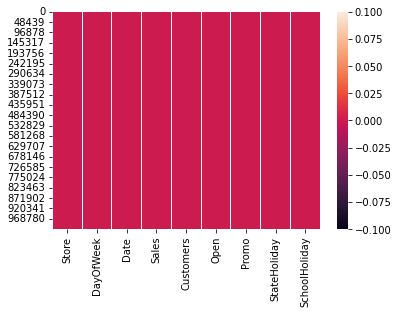

In [163]:
sns.heatmap(vendas_treino.isnull());

*Tanto o mapa de calor quanto o resumo dos valores nulos nos mostraram que para os dados de vendas não há valores nulos.*

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff2db1db150>,
      dtype=object)

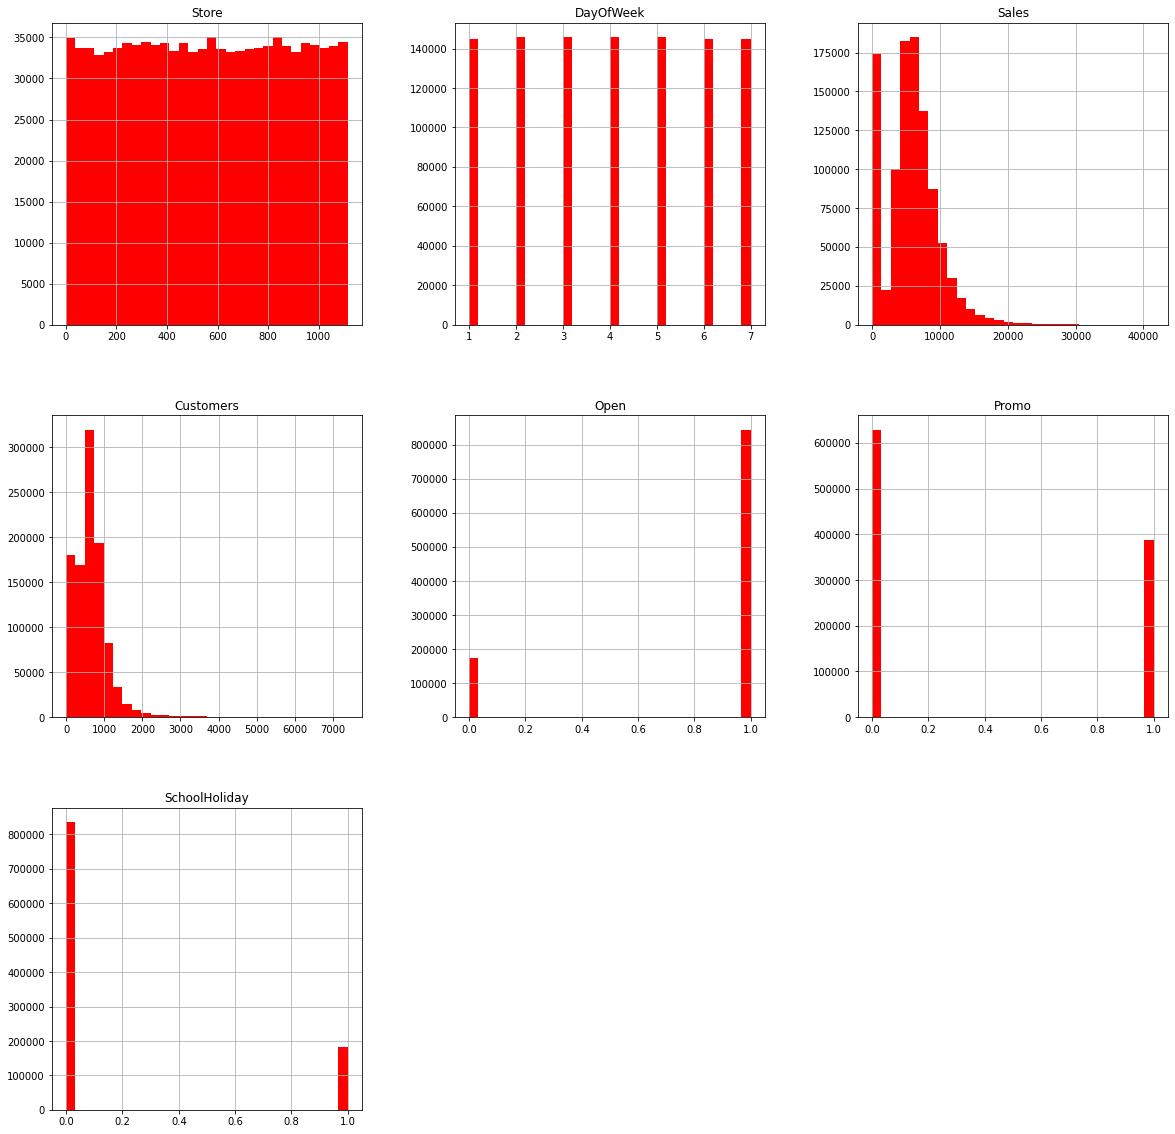

In [164]:
vendas_treino.hist(bins = 30, figsize= (20, 20), color= 'r')

No histograma acima podemos observar:


##### * O total de vendas está na faixa de até 7 mil euros por dia;  
#####* A quantidade de clientes está por volta de 700 por dia;
#####* As vendas por dia da semana estão bem equiparadas;



In [165]:
vendas_treino['Customers'].max()

7388

In [166]:
vendas_treino['Sales'].max()

41551

In [167]:
lojasfechadas= vendas_treino[vendas_treino['Open']==0 ]
lojasabertas= vendas_treino[vendas_treino['Open']==1 ]


In [168]:
print('Total= ', len(vendas_treino))
print('Número de lojas/dia fechado= ', len(lojasfechadas))
print('Número de lojas/dia aberto= ', len(lojasabertas))

Total=  1017209
Número de lojas/dia fechado=  172817
Número de lojas/dia aberto=  844392


*É possível observar que os valores de dias de loja fechados são muitos, e estes valores podem influenciar nas nossas médias de vendas, portanto precisaremos retirar dos nossos dados esses valores de 'Open'=0*

In [169]:
vendas_treino= vendas_treino[vendas_treino['Open']==1]

In [170]:
vendas_treino.shape

(844392, 9)

In [171]:
vendas_treino.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


*Agora temos apenas dias de loja aberta, portanto não há necessidade da coluna 'Open'*

In [172]:
vendas_treino.drop(['Open'], axis = 1, inplace=True)

In [173]:
vendas_treino.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,0,1
1,2,5,2015-07-31,6064,625,1,0,1
2,3,5,2015-07-31,8314,821,1,0,1
3,4,5,2015-07-31,13995,1498,1,0,1
4,5,5,2015-07-31,4822,559,1,0,1


In [174]:
vendas_treino.describe()

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday
count,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000
mean,558.422920,3.520361,6955.514291,762.728395,0.446352,0.193580
std,321.731914,1.723689,3104.214680,401.227674,0.497114,0.395103
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,280.000000,2.000000,4859.000000,519.000000,0.000000,0.000000
50%,558.000000,3.000000,6369.000000,676.000000,0.000000,0.000000
75%,837.000000,5.000000,8360.000000,893.000000,1.000000,0.000000
max,1115.000000,7.000000,41551.000000,7388.000000,1.000000,1.000000


*Percebemos  que o valor médio de vendas aumentou, antes 5.773, agora 6955.5, além do aumento nos números de clientes, isso ocorreu porque apagamos os valores 0 (dias de loja fechada), que estava influeciando diretamente nas médias.*

## **Dados das Lojas**

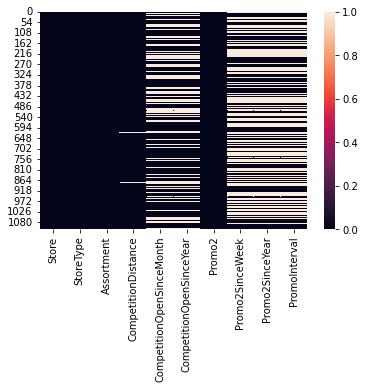

In [175]:
sns.heatmap(Lojas_treino.isnull());

In [176]:
Lojas_treino.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

*Com o gráfico de calor e o filtro aplicado para ver os totais de valores nulos por atributo, é possível vermos que há muitos valores nulos nos dados das lojas, então precisaremos fazer o tratamento destes dados.*

In [177]:
Lojas_treino[Lojas_treino['CompetitionDistance'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


*Apenas 3 lojas não possuem os dados de CompetitionDistance (distancia da loja concorrente).* 

In [178]:
Lojas_treino[Lojas_treino['CompetitionOpenSinceMonth'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [179]:
Lojas_treino[Lojas_treino['CompetitionOpenSinceYear'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


*Vemos que o total de linhas é 354, ou seja, total de lojas com valores nulos é a mesma quantidade para o atributo CompetitionOpenSinceMonth (mês que foi aberta a loja concorrente), e para o CompetitionOpenSinceYear (ano que foi aberta a loja concorrente).*

In [180]:
Lojas_treino[Lojas_treino['Promo2']== 0]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1107,1108,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN
1109,1110,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN


*A mesma relação vemos para o atributo Promo2 quando o valor é 0, ou seja, não tinha promoção, possui 544 registros, o mesmo valor para, Promo2SinceWeek (semana que começou a promoção 2),	Promo2SinceYear (ano que começou a promoção 2), e	PromoInterval.*

In [181]:
tratament= ['Promo2SinceWeek',	'Promo2SinceYear', 	'PromoInterval',
            'CompetitionOpenSinceMonth',	'CompetitionOpenSinceYear']
for str in tratament:
  Lojas_treino[str].fillna(0, inplace=True)

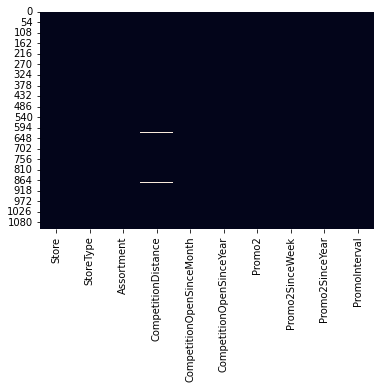

In [182]:
sns.heatmap(Lojas_treino.isnull(), cbar= False)

*Para o preenchimento dos valores nulos nas colunas Promo2SinceWeek,	Promo2SinceYear, PromoInterval, CompetitionOpenSinceMonth,e CompetitionOpenSinceYear, não é possível fazer uma média, pois não é referente a valores numericos e sim, strings, portanto podemos fazer o preenchimento desses valores nulos por 0.*

In [183]:
Lojas_treino['CompetitionDistance'].fillna(Lojas_treino['CompetitionDistance'].mean(), inplace=True)

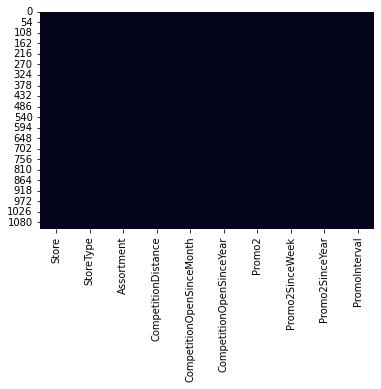

In [184]:
sns.heatmap(Lojas_treino.isnull(), cbar= False)

*Já para o atributo CompetitionDistance que é um valor numérico podemos fazer uma média dos valores para preencher os valores nulos, também usando fillna para preenchimento, e mean para media. Agora no gráfico de calor podemos ver que não há mais valores nulos*

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff2db1abe90>,
      dtype=object)

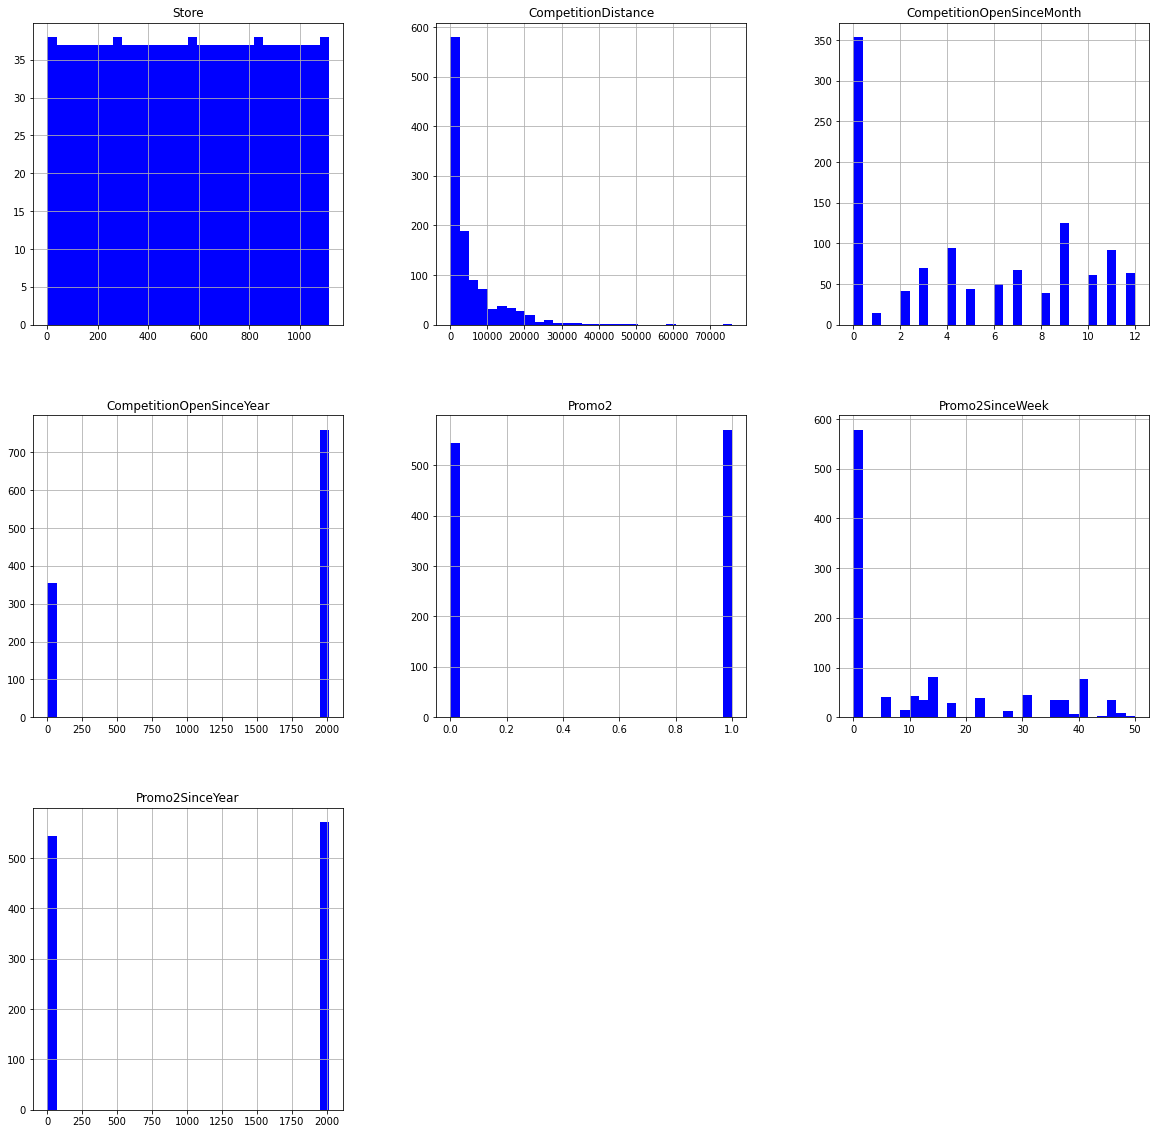

In [185]:
Lojas_treino.hist(bins= 30, figsize=(20,20), color='b')

Nos histogramas acima, podmos observar que:

*   A maioria das CompetitionDistance (distancia das lojas concorrentes) está entre 1 á 4 km;
*   Cerca da metade das lojas participam da Promo2.



## **Dados Unidos- Vendas + Lojas**

In [186]:
dadosunidos= pd.merge(Lojas_treino, vendas_treino, how= 'inner', on= 'Store' )

In [187]:
dadosunidos.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,5,2015-07-31,5263,555,1,0,1
1,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,4,2015-07-30,5020,546,1,0,1
2,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,3,2015-07-29,4782,523,1,0,1
3,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2,2015-07-28,5011,560,1,0,1
4,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,1,2015-07-27,6102,612,1,0,1


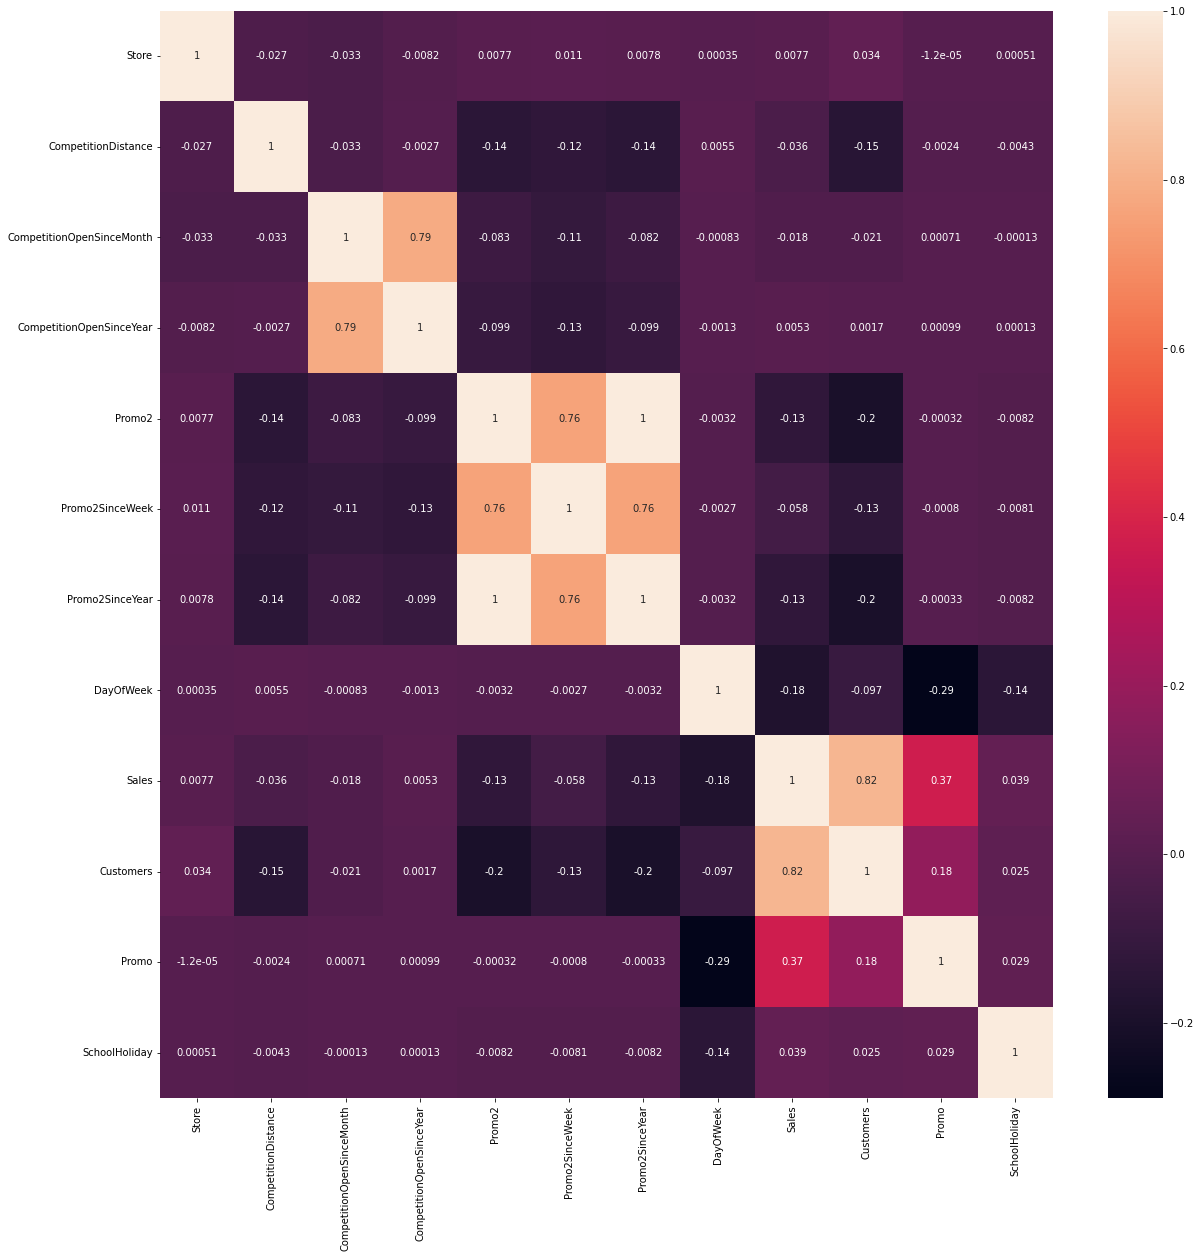

In [188]:
correlação= dadosunidos.corr()
f, ax= plt.subplots(figsize= (20,20))
sns.heatmap(correlação, annot=True);

*A maior correlação observada é de Customers e Sales (cientes e vendas), quanto mais clientes entram nas lojas mais vendas serão feitas. Há outras correlações como a Promo2 com Promo2SinceWeek e	Promo2SinceYear, que para preencheros os dados de ano e mês precisamos da promoção, portanto não é uma correlação que nos dá muito insght.*

In [189]:
correlação= dadosunidos.corr()['Sales'].sort_values()
correlação

DayOfWeek                   -0.178736
Promo2SinceYear             -0.127621
Promo2                      -0.127596
Promo2SinceWeek             -0.058476
CompetitionDistance         -0.036343
CompetitionOpenSinceMonth   -0.018370
CompetitionOpenSinceYear     0.005266
Store                        0.007710
SchoolHoliday                0.038617
Promo                        0.368145
Customers                    0.823597
Sales                        1.000000
Name: Sales, dtype: float64

*Para analisarmos um atributo em específico como Sales, podemos usar filtro, e usar o sort_values para retornar em ordem. Acima é possível ver que o atributo com maior correlação com Sales (vendas) é o Customers (clientes), seguigo por Promo, já a menor correlação, é DayOfWeek  (dia da semana), ou seja, não há tanta influencia entre o dia da semana com a quantidade de vendas.*

In [190]:
dadosunidos['Year']= pd.DatetimeIndex(dadosunidos['Date']).year

In [191]:
dadosunidos.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,Year
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,5,2015-07-31,5263,555,1,0,1,2015
1,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,4,2015-07-30,5020,546,1,0,1,2015
2,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,3,2015-07-29,4782,523,1,0,1,2015
3,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2,2015-07-28,5011,560,1,0,1,2015
4,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,1,2015-07-27,6102,612,1,0,1,2015


In [192]:
dadosunidos['Month']= pd.DatetimeIndex(dadosunidos['Date']).month
dadosunidos.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,Year,Month
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,5,2015-07-31,5263,555,1,0,1,2015,7
1,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,4,2015-07-30,5020,546,1,0,1,2015,7
2,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,3,2015-07-29,4782,523,1,0,1,2015,7
3,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2,2015-07-28,5011,560,1,0,1,2015,7
4,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,1,2015-07-27,6102,612,1,0,1,2015,7


In [193]:
dadosunidos['Day']= pd.DatetimeIndex(dadosunidos['Date']).day
dadosunidos.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,Year,Month,Day
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,5,2015-07-31,5263,555,1,0,1,2015,7,31
1,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,4,2015-07-30,5020,546,1,0,1,2015,7,30
2,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,3,2015-07-29,4782,523,1,0,1,2015,7,29
3,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2,2015-07-28,5011,560,1,0,1,2015,7,28
4,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,1,2015-07-27,6102,612,1,0,1,2015,7,27


*Separamos o atributo Date em 3 colunas (Year, Month, Day), assim podemos fazer gráficos para representação das vendas com mais especificidade.*

Text(0.5, 1.0, 'Média de vendas por mês')

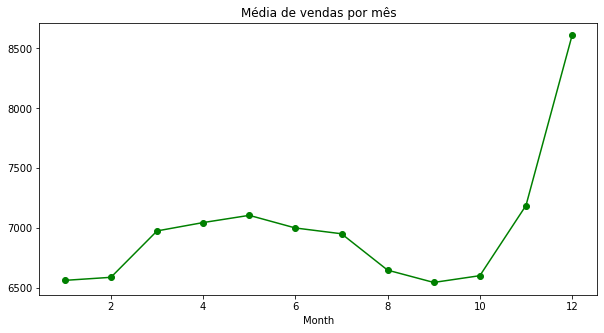

In [194]:
axis= dadosunidos.groupby('Month')[('Sales')].mean().plot(figsize=(10,5), marker= 'o', color= 'g')
axis.set_title('Média de vendas por mês')

Text(0.5, 1.0, 'Média de clientes por mês')

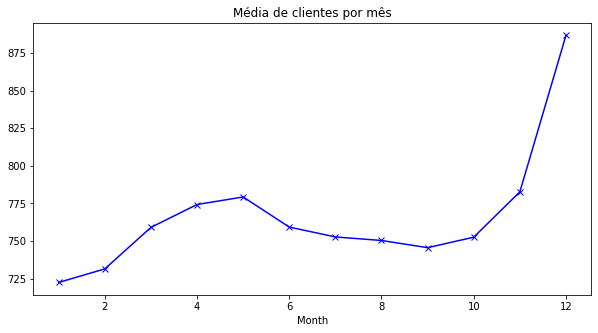

In [195]:
axis= dadosunidos.groupby('Month')[('Customers')].mean().plot(figsize=(10,5), marker= 'x', color= 'b')
axis.set_title('Média de clientes por mês')

*Após a divisão da coluna Date em Month, Year, Day (mês, ano e dia), podemos fazer gráficos para analisar a media das vendas por mês, por exemplo, acima vimos que as vendas crescem em novembro e dezemmbro, e comparando com a média de clientes no outro grafico, vemos que há grande relação, mas que o volume de clientes, sempre é maior que as vendas.*

Text(0.5, 1.0, 'Média de vendas por ano')

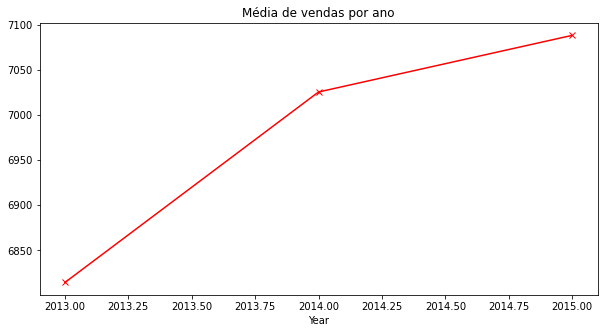

In [196]:
axis= dadosunidos.groupby('Year')[('Sales')].mean().plot(figsize=(10,5), marker= 'x', color= 'r')
axis.set_title('Média de vendas por ano')

Text(0.5, 1.0, 'Média de vendas por dia')

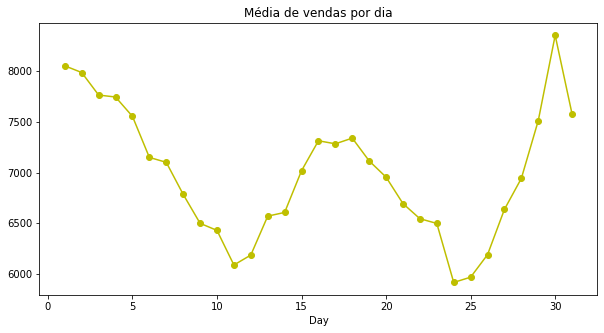

In [197]:
axis= dadosunidos.groupby('Day')[('Sales')].mean().plot(figsize=(10,5), marker= 'o', color= 'y')
axis.set_title('Média de vendas por dia')

Text(0.5, 1.0, 'Média de vendas por dia da semana')

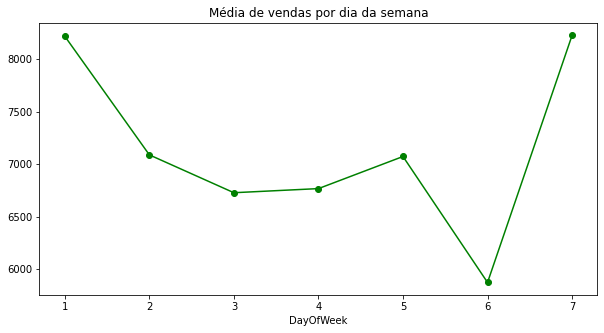

In [198]:
axis= dadosunidos.groupby('DayOfWeek')[('Sales')].mean().plot(figsize=(10,5), marker= 'o', color= 'g')
axis.set_title('Média de vendas por dia da semana')

*Já para média de vendas por dia, conseguimos perceber que no começo e no fim do mês que ocorrem mais vendas, assim, as lojas poderiam criar promoções, nesses dias para aumentar ainda mais as vendas. Ja em relação ao DayOfWeek 
(dia da semana), o maior numero de vendas ocorrem nos dias 1 e 7, ou seja,
segunda feira e domingo, assim eles podem se organizar um dia antes para estarem com os estoques abastecidos, e com maior número de vendedores.*

Text(0.5, 1.0, 'Média de clientes por dia da semana')

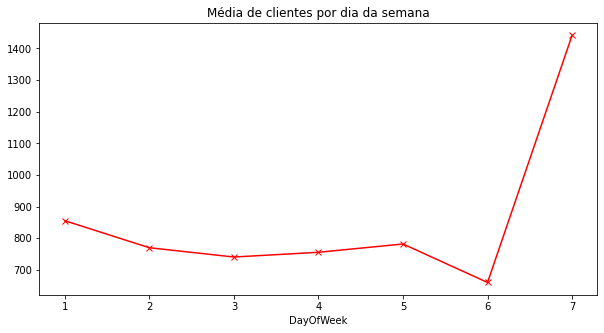

In [199]:
axis= dadosunidos.groupby('DayOfWeek')[('Customers')].mean().plot(figsize=(10,5), marker= 'x', color= 'r')
axis.set_title('Média de clientes por dia da semana')

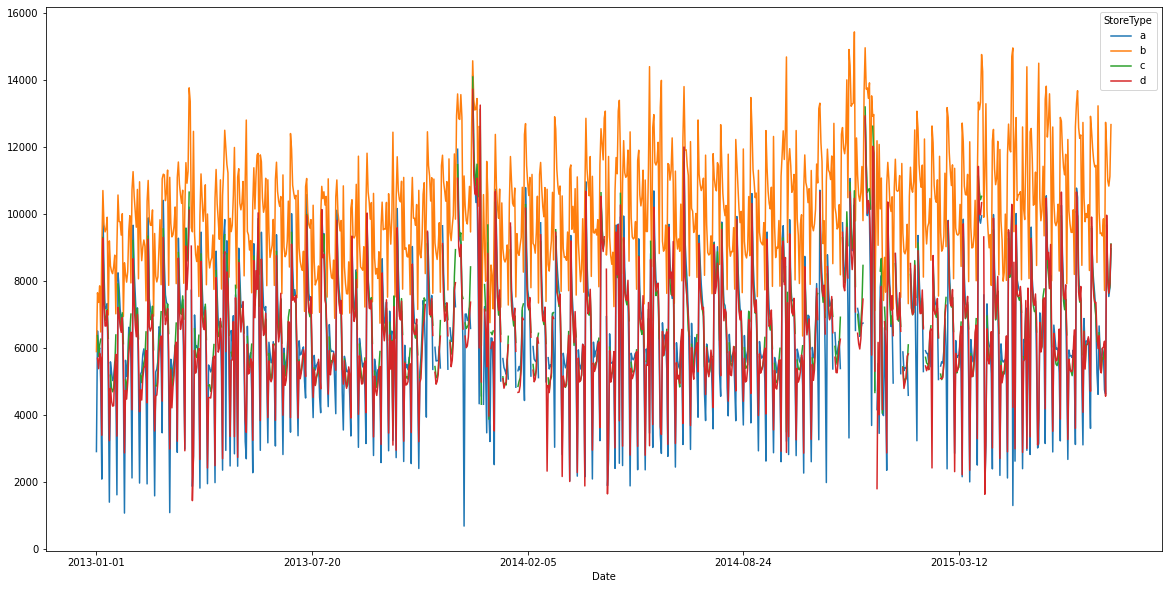

In [200]:
fig, ax= plt.subplots(figsize = (20,10))
dadosunidos.groupby(['Date', 'StoreType']).mean()['Sales'].unstack().plot(ax=ax)

*Para saber por exempo, se há algum padrão nas quantidades de vendas que se relacione com o tipo de loja, podemos fazer um gráfico com mais de um atributo, neste caso Date, StoreType (data e tipo de loja). Então no gráfico acima, podemos verificar que a loja tipo b (laranja), possui maiores vendas, já a loja tipo a (azul) possui menores vendas, tudo isso no período de 2013 á 2015.*

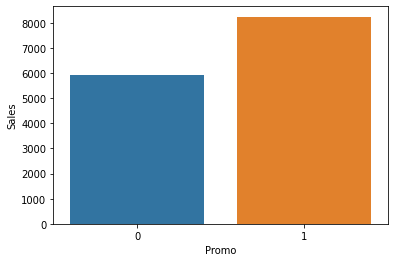

In [201]:
sns.barplot(x= 'Promo', y= 'Sales', data= dadosunidos);

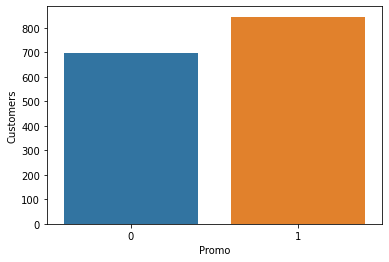

In [202]:
sns.barplot(x= 'Promo', y= 'Customers', data= dadosunidos);

O objetivo deste gráfico de barras é descobrirmos se as promoções influenciam na quantidade de vendas, e no volume de clientes. Nestes gráficos acima, conseguimos analisar que:

*   A promoção tem influencia positiva em ambos os atributos;
*   Para quantidade de vendas houve um aumento de 2000 euros quando há promoção;
*   Para quantidade de clientes houve um aumento de 100 clientes a mais quando há promoção;
*   O volume de clientes não aumenta tanto quando há promoções quanto nas vendas.




## **Treinamento do modelo- Parte 1**

In [203]:
!pip install fbprophet

In [204]:
from fbprophet import Prophet

In [205]:
def previsãodevendas(store_id, vendas_df, periods):
  vendas_df= vendas_df[vendas_df['Store']== store_id]
  vendas_df= vendas_df[['Date', 'Sales']].rename (columns = {'Date': 'ds', 'Sales': 'y'})
  vendas_df= vendas_df.sort_values(by= 'ds') 

  model = Prophet()
  model.fit(vendas_df)
  future= model.make_future_dataframe(periods= periods)
  forecast= model.predict(future)
  figure1= model.plot(forecast, xlabel= 'Data', ylabel= 'Vendas')
  figure2= model.plot_components(forecast)

  return vendas_df, forecast                    

In [206]:
#df= previsãodevendas(10, dadosunidos, 60)
#df


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


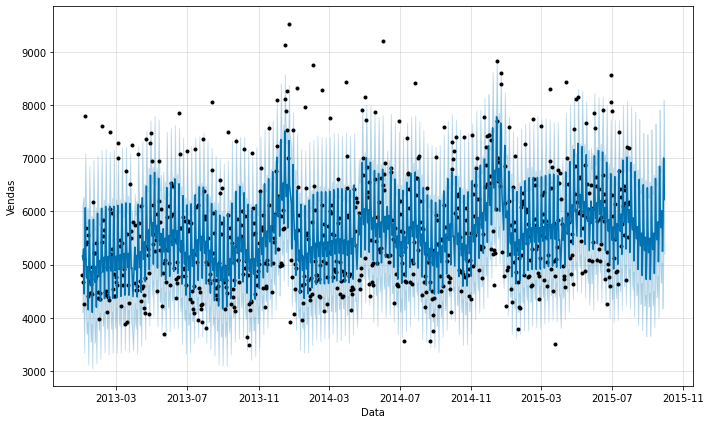

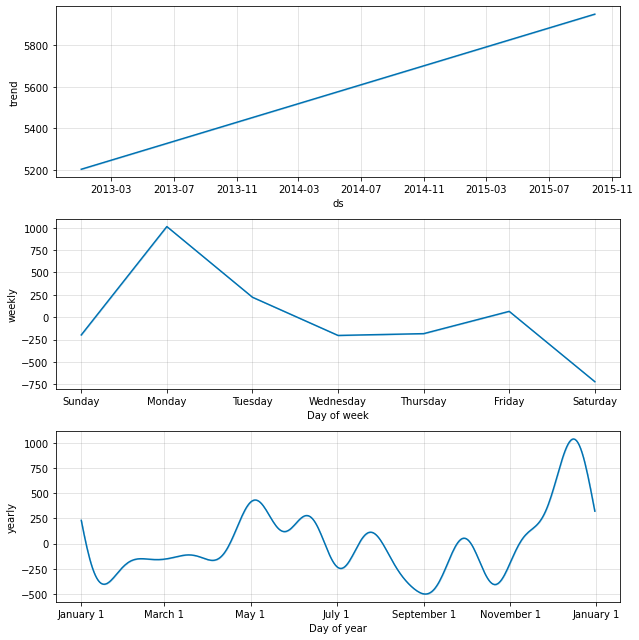

In [207]:
dforiginal, dfprevisão= previsãodevendas(10, dadosunidos, 60)

*Essa biblioteca do facebook cria a primeira figura com os pontos pretos q são as vendas do passado, e as previsões, e tambem cria alguns graficos, com médias de vendas por dia da semana, mostra a tendencia de vendas por ano, e por meses.*

In [208]:
dforiginal.shape, dfprevisão.shape

((784, 2), (844, 19))

*Podemos observar que nos dados originais há 784 registros, ja na previsão há 794, ou seja, os registros antigos, mais as 10 previsões.*

In [209]:
dforiginal.head()

,ds,y
7819,2013-01-02,4812
7818,2013-01-03,4675
7817,2013-01-04,5114
7816,2013-01-05,4256
7815,2013-01-07,7804


In [210]:
dfprevisão.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-02,5204.484727,4103.387643,6130.809822,5204.484727,5204.484727,-44.077962,-44.077962,-44.077962,-203.046067,-203.046067,-203.046067,158.968105,158.968105,158.968105,0.0,0.0,0.0,5160.406765
1,2013-01-03,5205.228405,4163.885604,6199.880786,5205.228405,5205.228405,-93.232653,-93.232653,-93.232653,-183.012971,-183.012971,-183.012971,89.780317,89.780317,89.780317,0.0,0.0,0.0,5111.995752
2,2013-01-04,5205.972083,4204.021727,6269.082425,5205.972083,5205.972083,89.471792,89.471792,89.471792,65.942825,65.942825,65.942825,23.528967,23.528967,23.528967,0.0,0.0,0.0,5295.443875
3,2013-01-05,5206.715761,3344.510325,5521.624549,5206.715761,5206.715761,-758.331393,-758.331393,-758.331393,-719.174286,-719.174286,-719.174286,-39.157107,-39.157107,-39.157107,0.0,0.0,0.0,4448.384368
4,2013-01-07,5208.203117,5067.167908,7090.475887,5208.203117,5208.203117,861.318599,861.318599,861.318599,1013.040634,1013.040634,1013.040634,-151.722034,-151.722034,-151.722034,0.0,0.0,0.0,6069.521716


In [211]:
dfprevisão.tail(60).to_csv('PrevisãoVendas.csv')

*Dando uma olhada nos primeiros dados do dfprevisão, vemos que foram adicionadas varias colunas, algumas que geraram os gráficos acima. Mas estes dados ainda são os dados originais, para conferirmos os dados de previsão, precisamos buscar os 10 últimos dados.*

## **Treinamento do modelo- Parte 2**

*Agora faremos a implementação das previsões passando informações de feriados para essa ferramenta.*

In [212]:
def previsãodevendas(store_id, vendas_df, holidays, periods):
  vendas_df= vendas_df[vendas_df['Store']== store_id]
  vendas_df= vendas_df[['Date', 'Sales']].rename (columns = {'Date': 'ds', 'Sales': 'y'})
  vendas_df= vendas_df.sort_values(by= 'ds') 

  model = Prophet(holidays=holidays)
  model.fit(vendas_df)
  future= model.make_future_dataframe(periods= periods)
  forecast= model.predict(future)
  figure1= model.plot(forecast, xlabel= 'Data', ylabel= 'Vendas')
  figure2= model.plot_components(forecast)

  return vendas_df, forecast   

*As unicas alterações nessa função é que passamos um parâmetro adicional, holidays para buscar os feriados, e na criação do modelo iremos colocar um parâmetro chamado holidays=holidays*

In [213]:
feriadoescolar= dadosunidos[dadosunidos['SchoolHoliday']==1].loc[:, 'Date'].values
feriadoescolar

array(['2015-07-31', '2015-07-30', '2015-07-29', ..., '2013-01-04',
       '2013-01-03', '2013-01-02'], dtype=object)

In [214]:
feriadoescolar.shape

(163457,)

In [215]:
dadosunidos.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,Year,Month,Day
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,5,2015-07-31,5263,555,1,0,1,2015,7,31
1,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,4,2015-07-30,5020,546,1,0,1,2015,7,30
2,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,3,2015-07-29,4782,523,1,0,1,2015,7,29
3,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2,2015-07-28,5011,560,1,0,1,2015,7,28
4,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,1,2015-07-27,6102,612,1,0,1,2015,7,27


In [216]:
len(np.unique(feriadoescolar))

477

*Verificando a quantidade de registros em feriadoescolar, vemos que há um valor muito alto, isso porque as datas se repetem, ja que a mesma data e aplicada para todas as lojas, mas em relação a isso não precisaremos fazer nenhum tratamento, pois o próprio algoritmo, Prophet do facebook já faz todo processamento necessário.*

In [217]:
feriadoestadual= dadosunidos[(dadosunidos['StateHoliday'] == 'a') |
                            (dadosunidos['StateHoliday'] == 'b') |
                            (dadosunidos['StateHoliday'] == 'c')].loc[:, 'Date'].values


In [218]:
feriadoestadual.shape

(910,)

In [219]:
len(np.unique(feriadoestadual))

35

*O mesmo fazemos para feriadoestadual, lembrando que precisaremos colocar os 3 tipos de feriados dos nossos dados: a para feriado pública, b para Páscoa, e c para Natal, quando buscamos quantidade de registros utilizando shape, ele nos trás todos, incluindo repetidos, então usamos o comando, np.unique para nos retornar apenas registros unicos, apenas datas unicas que tiveram feriado estadual, e as lojas estavam abertas.*

*Agora criaremos um data frame para cada variavel criada.*

In [220]:
feriadoestadual= pd.DataFrame({'ds': pd.to_datetime(feriadoestadual),
                               'holiday': 'feriadoestadual'})
feriadoestadual

,ds,holiday
0,2014-10-03,feriadoestadual
1,2013-10-03,feriadoestadual
2,2015-06-04,feriadoestadual
3,2014-06-19,feriadoestadual
4,2013-05-30,feriadoestadual
...,...,...
905,2013-04-01,feriadoestadual
906,2013-08-15,feriadoestadual
907,2015-06-04,feriadoestadual
908,2014-06-19,feriadoestadual


In [221]:
feriadoescolar= pd.DataFrame({'ds': pd.to_datetime(feriadoescolar),
                               'holiday': 'feriadoescolar'})
feriadoescolar

,ds,holiday
0,2015-07-31,feriadoescolar
1,2015-07-30,feriadoescolar
2,2015-07-29,feriadoescolar
3,2015-07-28,feriadoescolar
4,2015-07-27,feriadoescolar
...,...,...
163452,2013-01-07,feriadoescolar
163453,2013-01-05,feriadoescolar
163454,2013-01-04,feriadoescolar
163455,2013-01-03,feriadoescolar


In [222]:
feriado_escolar_estadual= pd.concat((feriadoescolar, feriadoestadual))
feriado_escolar_estadual

,ds,holiday
0,2015-07-31,feriadoescolar
1,2015-07-30,feriadoescolar
2,2015-07-29,feriadoescolar
3,2015-07-28,feriadoescolar
4,2015-07-27,feriadoescolar
...,...,...
905,2013-04-01,feriadoestadual
906,2013-08-15,feriadoestadual
907,2015-06-04,feriadoestadual
908,2014-06-19,feriadoestadual


*Após concatenarmos os dois Data Frame, podemos fazer as previsões.*

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


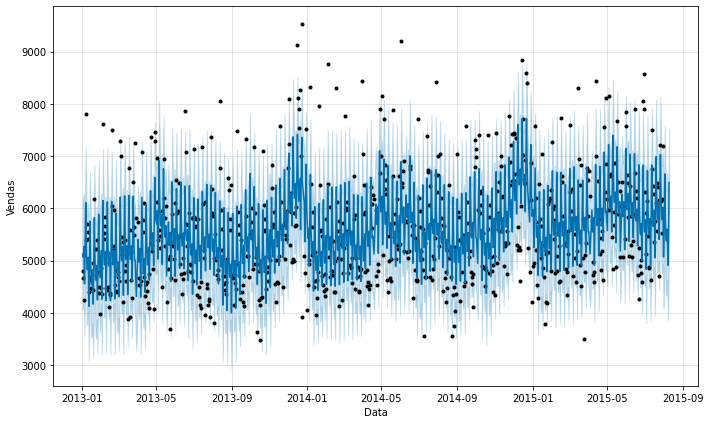

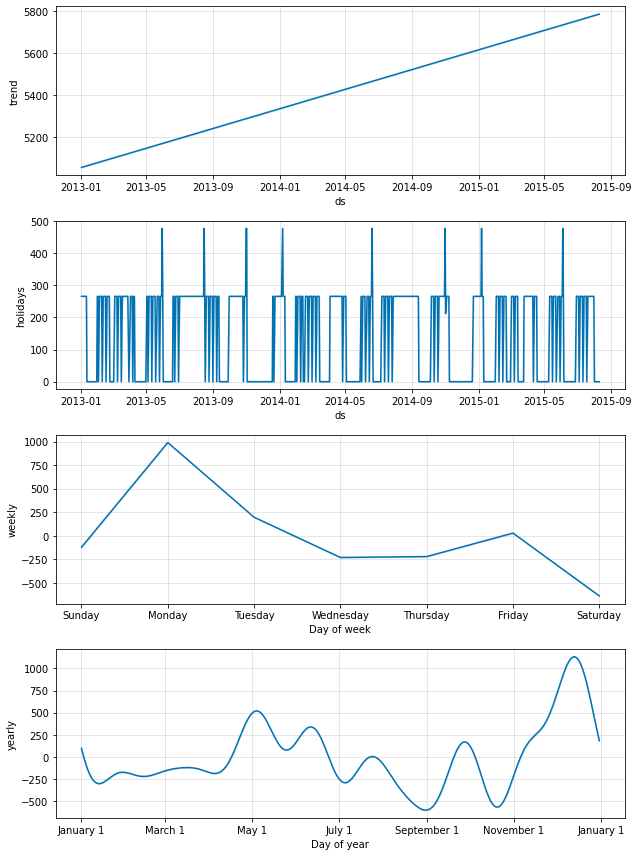

In [149]:
dforiginal, dfprevisão = previsãodevendas(10, dadosunidos, feriado_escolar_estadual, 10)

*É muito importante considerarmos os feriados, pois eles podem influenciar positiva ou negativamente, assim o algoritmo poderá prever, se as vendas no próximo feriado irá crescer ou diminuir, caso a loja abra. O algoritmo gerou um gráfico acima, holidays, que nos mostra os picos de vendas nos feriados.*